In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

In [201]:
df_all = pd.read_json('./data/extracted_all.json')
#df_all = pd.read_json('./extracted_mini.json')

Text(0.5, 1.0, 'Total Ascents >= 250')

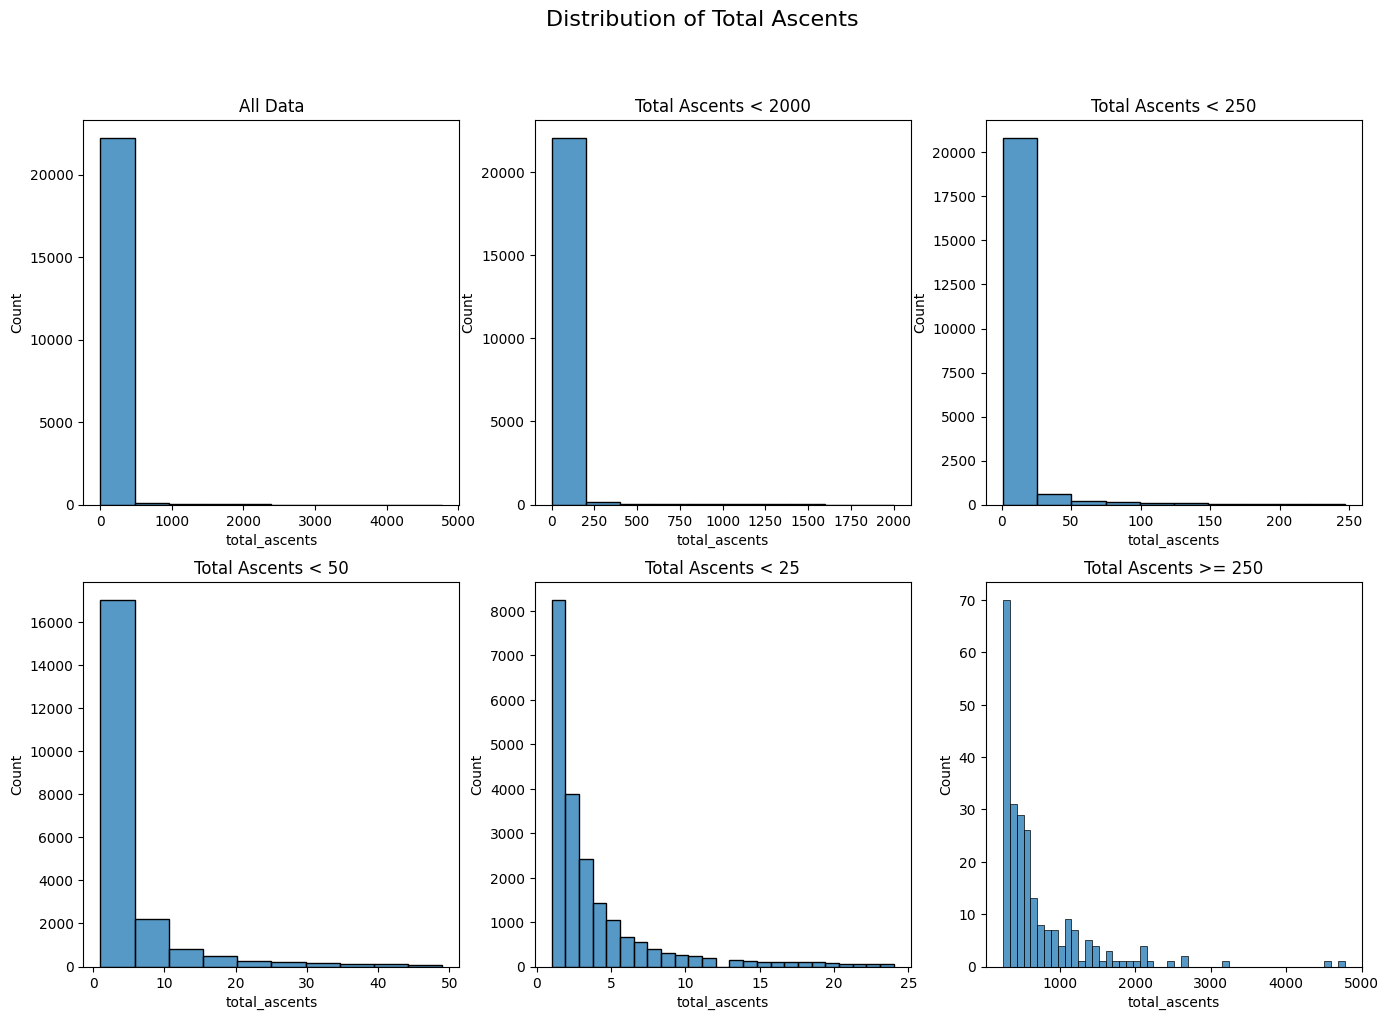

In [202]:
fs = 11


fig, axes = plt.subplots(2, 3, figsize=(1.5*fs,fs))
fig.suptitle('Distribution of Total Ascents', fontsize=16)
sns.histplot(data=df_all, x='total_ascents', bins=10, ax=axes[0, 0])
axes[0, 0].set_title('All Data')


sns.histplot(data=df_all[df_all['total_ascents']<2000], x='total_ascents', bins=10, ax=axes[0, 1])
axes[0, 1].set_title('Total Ascents < 2000')


sns.histplot(data=df_all[df_all['total_ascents']<250], x='total_ascents', bins=10, ax=axes[0, 2])
axes[0, 2].set_title('Total Ascents < 250')

sns.histplot(data=df_all[df_all['total_ascents']<50], x='total_ascents', bins=10, ax=axes[1, 0])
axes[1, 0].set_title('Total Ascents < 50')

sns.histplot(data=df_all[df_all['total_ascents']<25], x='total_ascents', bins=25, ax=axes[1, 1])
axes[1, 1].set_title('Total Ascents < 25')
sns.histplot(data=df_all[df_all['total_ascents']>250], x='total_ascents', bins=50, ax=axes[1, 2])
axes[1, 2].set_title('Total Ascents >= 250')


In [203]:
# df = df_all.sample(min(1000, df_all.shape[0]))
df = df_all.copy()

In [204]:
df.head().sort_values(by='total_ascents', ascending=False)

,uuid,layout_id,layout_deviant_id,setter_id,setter_username,name,description,hsm,edge_left,edge_right,edge_bottom,edge_top,frames_count,frames_pace,is_draft,is_listed,created_at,climb_stats,placements,total_ascents
0,f01419e1-2672-4593-96ca-62e3655abc46,1,9.0,1078,jwebxl,swooped,,1,32,88,8,152,1,0,False,True,2018-12-06 21:15:01.127371+00:00,"[{'angle': 0, 'fa_at': '2019-12-05 16:39:44', ...","[{'x': 20, 'y': 0, 'type': 'FEET-ONLY', 'ledPo...",4778
1,d0e5387d-5b97-4d38-b4e9-3fc4dfd61ef6,1,9.0,2652,will_avelar,Floats Your Boat,,1,32,88,24,152,1,0,False,True,2019-02-16 22:42:46.151544+00:00,"[{'angle': 0, 'fa_at': '2019-10-20 05:59:35', ...","[{'x': 14, 'y': 3, 'type': 'FEET-ONLY', 'ledPo...",4593
2,a9fcd0bc-271d-402f-8c4c-80de885b7bca,1,9.0,1061,KilterStudio,Lack of Faith,,1,32,112,16,152,1,0,False,True,2018-12-16 22:59:03.865970+00:00,"[{'angle': 0, 'fa_at': '2019-10-21 01:18:27', ...","[{'x': 8, 'y': 1, 'type': 'FEET-ONLY', 'ledPos...",3200
3,18e34282-fdf5-4d6b-a0a3-a7b57f0f2689,1,9.0,1078,jwebxl,proj braj,,1,32,96,8,136,1,0,False,True,2018-12-06 22:11:35.296081+00:00,"[{'angle': 0, 'fa_at': '2020-02-09 13:22:42', ...","[{'x': 8, 'y': 0, 'type': 'FEET-ONLY', 'ledPos...",2656
4,bf0db71d-0d67-4289-beef-46e226216bf6,1,9.0,1841,martiiiin,Sour Gummi Worms,,1,40,88,8,136,1,0,False,True,2018-11-30 04:36:30.522263+00:00,"[{'angle': 0, 'fa_at': '2019-11-06 00:34:55', ...","[{'x': 18, 'y': 0, 'type': 'FEET-ONLY', 'ledPo...",2655


In [205]:

# List to hold parsed climb stats DataFrames
routes = pd.DataFrame()

# Iterate over each row
for _, row in df.iterrows():
    climb_stats_df = pd.DataFrame(row['climb_stats'])
    if (climb_stats_df.empty):
        continue
    placements = pd.DataFrame(row['placements'])
    if (placements.shape[0] <= 1):
        continue
    placements['x_y'] = placements['x'].astype(str) + '_' + placements['y'].astype(str)
    if not 'type' in placements.columns:
        placements['type'] = 'MIDDLE'

    placements['type'] = placements['type'].fillna('MIDDLE')
    placements_pivot = placements.pivot(columns='x_y', values='type')
    placements_agg = placements_pivot.apply(lambda x: x.dropna().iloc[0], axis=0).to_frame().T


    route_df = climb_stats_df[['angle', 'difficulty_average']].copy()
    placements_agg_rep = pd.concat([placements_agg] * len(route_df), ignore_index=True)
    route_df = pd.concat([route_df, placements_agg_rep], axis=1)
    routes = pd.concat([routes, route_df], ignore_index=True)




In [207]:
print(routes.describe())
print(routes.head())
print(routes.columns)

              angle  difficulty_average
count  36470.000000        36470.000000
mean      36.730600           18.878805
std       13.259681            4.071796
min        0.000000           10.000000
25%       30.000000           16.000000
50%       40.000000           19.000000
75%       45.000000           22.000000
max       70.000000           33.000000
   angle  difficulty_average   12_23   12_7   14_31   14_35    14_9   16_19  \
0      0             14.8857  MIDDLE  START  MIDDLE  FINISH  MIDDLE  MIDDLE   
1      5             12.0000  MIDDLE  START  MIDDLE  FINISH  MIDDLE  MIDDLE   
2     10             15.8571  MIDDLE  START  MIDDLE  FINISH  MIDDLE  MIDDLE   
3     15             15.9526  MIDDLE  START  MIDDLE  FINISH  MIDDLE  MIDDLE   
4     20             16.1127  MIDDLE  START  MIDDLE  FINISH  MIDDLE  MIDDLE   

    16_5       20_0  ... 180_120 182_175 185_207 187_145 188_154 191_122  \
0  START  FEET-ONLY  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1  START  FEE

In [208]:
routes.to_json('preprocessed.json')

In [ ]:
routes.to_json('preprocessed.csv')